# On which platforms have you begun or completed data science courses?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../data/kaggle_survey_2020_responses.csv')

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df.iloc[0].tolist()

['Duration (in seconds)',
 'What is your age (# years)?',
 'What is your gender? - Selected Choice',
 'In which country do you currently reside?',
 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'For how many years have you been writing code and/or programming?',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++',
 'What pro

In [21]:
#locate where is the question
x = np.where(df.values == 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera')
df.columns[231:243]

Index(['Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_5',
       'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8', 'Q37_Part_9', 'Q37_Part_10',
       'Q37_Part_11', 'Q37_OTHER'],
      dtype='object')

In [24]:
df_q = df[['Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_5',
       'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8', 'Q37_Part_9', 'Q37_Part_10',
       'Q37_Part_11', 'Q37_OTHER']]

In [36]:
#Generation Z: 3 age group
index_age_group_1 = df[df['Q1'] == '18-21'].index.tolist()
age_group_1 = df_q.iloc[index_age_group_1]
index_age_group_2 = df[df['Q1'] == '22-24'].index.tolist()
age_group_2 = df_q.iloc[index_age_group_2]
index_age_group_3 = df[df['Q1'] == '25-29'].index.tolist()
age_group_3 = df_q.iloc[index_age_group_3]

## 1. Genreation Z Comparing

In [37]:
age_group1_encode = pd.get_dummies(age_group_1)
age_group2_encode = pd.get_dummies(age_group_2)
age_group3_encode = pd.get_dummies(age_group_3)

In [40]:
age_group1_encode.columns

Index(['Q37_Part_1_Coursera', 'Q37_Part_2_edX',
       'Q37_Part_3_Kaggle Learn Courses', 'Q37_Part_4_DataCamp',
       'Q37_Part_5_Fast.ai', 'Q37_Part_6_Udacity', 'Q37_Part_7_Udemy',
       'Q37_Part_8_LinkedIn Learning',
       'Q37_Part_9_Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
       'Q37_Part_10_University Courses (resulting in a university degree)',
       'Q37_Part_11_None', 'Q37_OTHER_Other'],
      dtype='object')

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


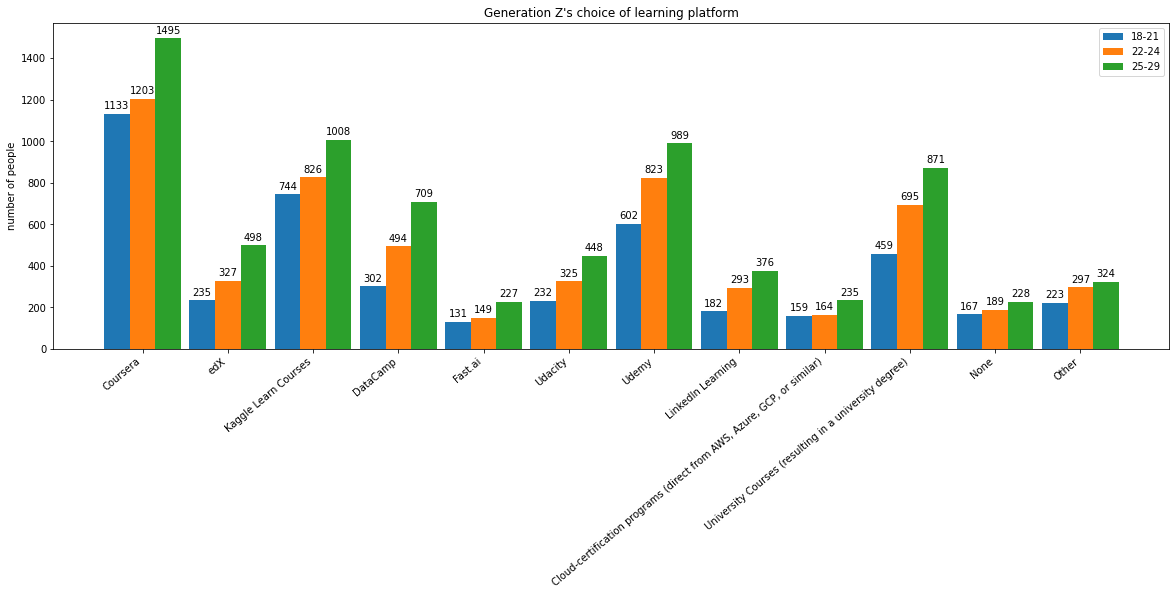

In [49]:
width = 0.3 #width of the bar
columns = ['Coursera','edX','Kaggle Learn Courses','DataCamp','Fast.ai','Udacity','Udemy','LinkedIn Learning',
           'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)','University Courses (resulting in a university degree)',
          'None','Other']


#set position of bar on X axis
p1 = np.arange(len(columns))
p2 = [x + width for x in p1]
p3 = [x + width for x in p2]

fig,ax = plt.subplots(figsize = (20,6))

bar1 = ax.bar(p1,height = age_group1_encode.sum(),width = width,label = '18-21')
bar2 = ax.bar(p2,height = age_group2_encode.sum(),width = width,label = '22-24')
bar3 = ax.bar(p3,height = age_group3_encode.sum(),width = width,label = '25-29')

ax.set_ylabel('number of people')
ax.set_title("Generation Z's choice of learning platform")
ax.set_xticklabels(columns,rotation=40, ha="right")
ax.set_xticks(p2)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

## 2. Comparison with older generation

In [55]:
other_age_index = df.drop(df.index[joinls]).index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     9,    12,
               14,
            ...
            20011, 20014, 20016, 20018, 20022, 20025, 20029, 20030, 20033,
            20034],
           dtype='int64', length=8771)

In [67]:
#getting the data ready
joinls = index_age_group_1 + index_age_group_2 + index_age_group_3

other_age_index = df.drop(df.index[joinls]).index

df_other_age = df_q.iloc[other_age_index]
df_other_age.drop(df_other_age.index[0],inplace = True)

df_generation_z = df_q.iloc[joinls]

df_other_age_encode = pd.get_dummies(df_other_age)
df_generation_z_encode = pd.get_dummies(df_generation_z)

/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


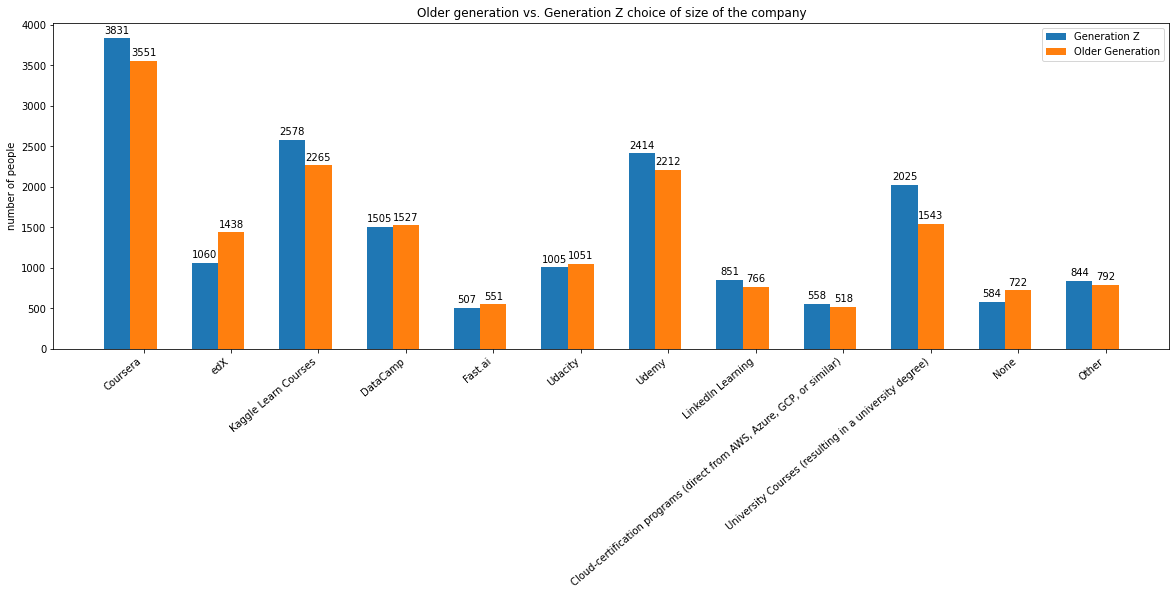

In [71]:
width = 0.3 #width of the bar
columns = ['Coursera','edX','Kaggle Learn Courses','DataCamp','Fast.ai','Udacity','Udemy','LinkedIn Learning',
           'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)','University Courses (resulting in a university degree)',
          'None','Other']


#set position of bar on X axis
p1 = np.arange(len(columns))
p2 = [x + width for x in p1]
p3 = [x + width for x in p2]


fig,ax = plt.subplots(figsize = (20,6))

bar5 = ax.bar(p1,height = df_generation_z_encode.sum(),width = width,label = 'Generation Z')
bar4 = ax.bar(p2,height = df_other_age_encode.sum(),width = width,label = 'Older Generation')


ax.set_ylabel('number of people')
ax.set_title("Older generation vs. Generation Z choice of size of the company")
ax.set_xticklabels(columns,rotation=40, ha="right")
ax.set_xticks(p2)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar5)
autolabel(bar4)



plt.show()